# Analyse de la base `clean_smart_logistics`

Ce notebook analyse les données nettoyées liées à la logistique intelligente.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("../.."))

from utils.db_utils import connect_db

# Connexion
engine = connect_db()

# Chargement
df = pd.read_sql("SELECT * FROM clean_smart_logistics_dataset", engine)

# Conversion datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

df.head()

,timestamp,asset_id,latitude,longitude,inventory_level,shipment_status,temperature,humidity,traffic_status,waiting_time,user_transaction_amount,user_purchase_frequency,logistics_delay_reason,asset_utilization,demand_forecast,logistics_delay
0,2024-03-20 00:11:00,TRUCK_7,-65.7383,11.2497,390,DELAYED,27.0,67.8,DETOUR,38,320,4,UNKNOWN,60.1,285,1
1,2024-10-30 07:53:00,TRUCK_6,22.2748,-131.7086,491,IN TRANSIT,22.5,54.3,HEAVY,16,439,7,WEATHER,80.9,174,1
2,2024-07-29 18:42:00,TRUCK_10,54.9232,79.5455,190,IN TRANSIT,25.2,62.2,DETOUR,34,355,3,UNKNOWN,99.2,260,0
3,2024-10-28 00:50:00,TRUCK_9,42.3900,-1.4788,330,DELIVERED,25.4,52.3,HEAVY,37,227,5,TRAFFIC,97.4,160,1
4,2024-09-27 15:52:00,TRUCK_7,-65.8477,47.9468,480,DELAYED,20.5,57.2,CLEAR,56,197,6,UNKNOWN,71.6,270,1


##  Évolution des statuts de livraison dans le temps

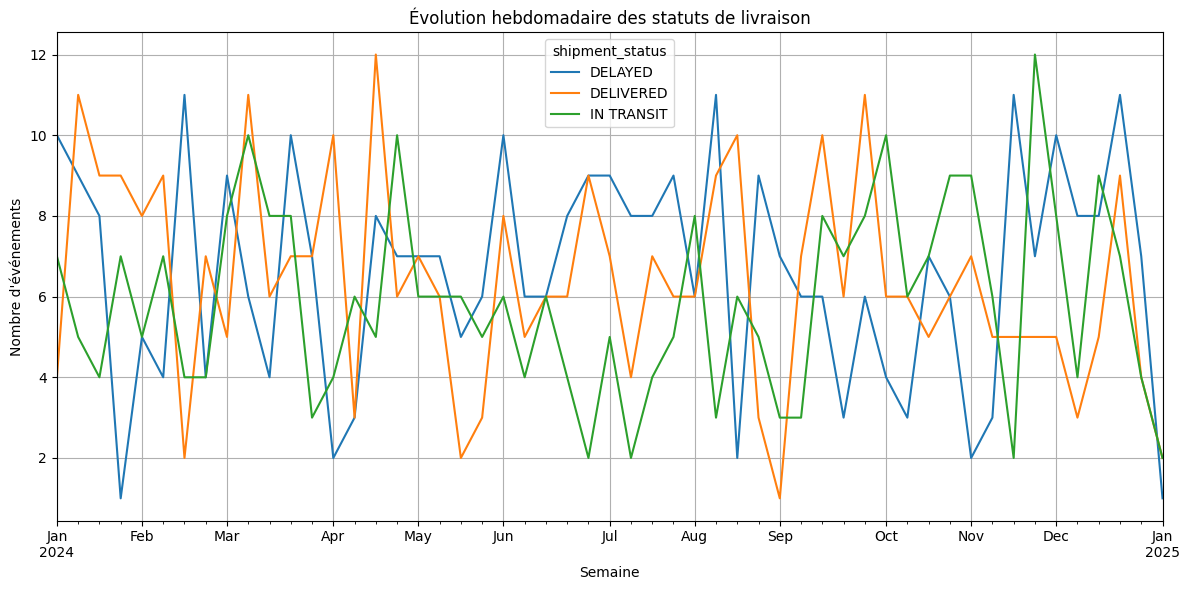

In [3]:
status_by_date = df.groupby([df["timestamp"].dt.to_period("W"), "shipment_status"]).size().unstack(fill_value=0)

status_by_date.plot(figsize=(12, 6))
plt.title("Évolution hebdomadaire des statuts de livraison")
plt.xlabel("Semaine")
plt.ylabel("Nombre d'événements")
plt.grid(True)
plt.tight_layout()
plt.show()

##  Température moyenne selon le statut de trafic

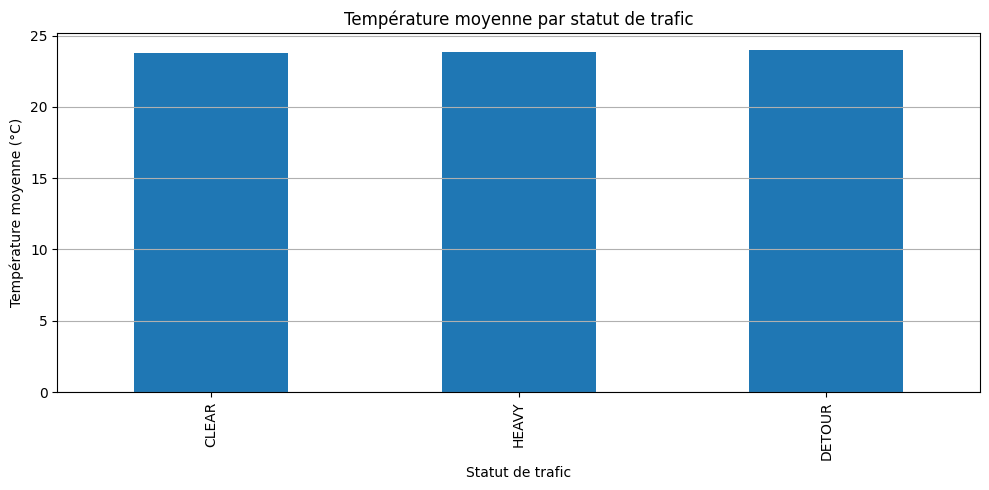

In [4]:
df_temp = df[df["temperature"].notna() & df["traffic_status"].notna()]
temp_by_traffic = df_temp.groupby("traffic_status")["temperature"].mean().sort_values()

temp_by_traffic.plot(kind="bar", figsize=(10, 5))
plt.title("Température moyenne par statut de trafic")
plt.xlabel("Statut de trafic")
plt.ylabel("Température moyenne (°C)")
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

##  Répartition des raisons de retards logistiques

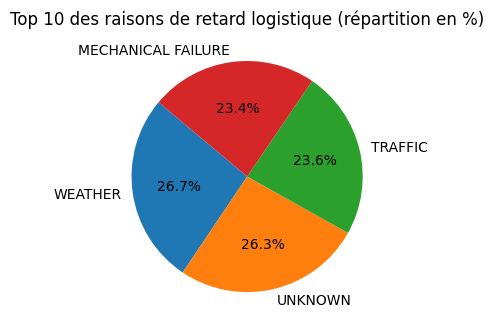

In [ ]:
reason_counts = df["logistics_delay_reason"].value_counts().head(10)
plt.figure(figsize=(4, 4))
plt.pie(reason_counts, labels=reason_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 des raisons de retard logistique (répartition en %)")
plt.tight_layout()
plt.show()


##  Corrélation entre prévision de la demande et utilisation des actifs

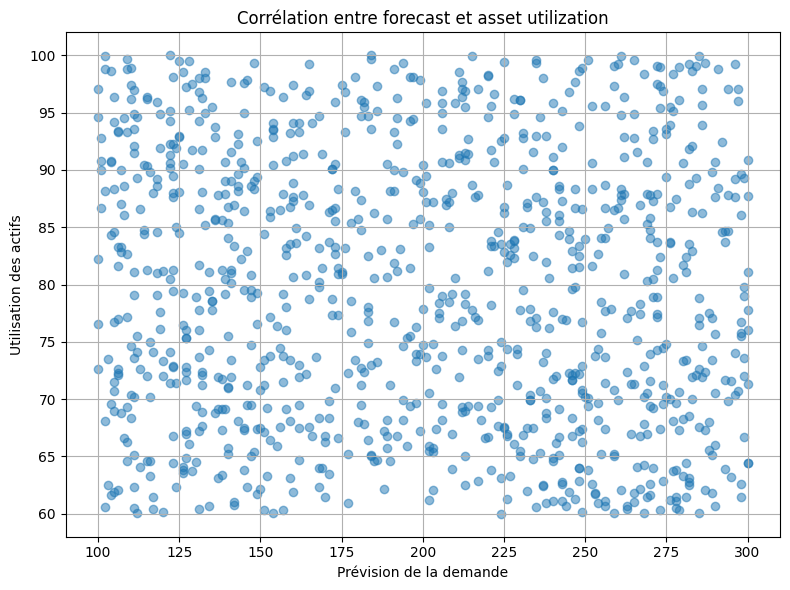

In [6]:
df_corr = df[["demand_forecast", "asset_utilization"]].dropna()

plt.figure(figsize=(8, 6))
plt.scatter(df_corr["demand_forecast"], df_corr["asset_utilization"], alpha=0.5)
plt.title("Corrélation entre forecast et asset utilization")
plt.xlabel("Prévision de la demande")
plt.ylabel("Utilisation des actifs")
plt.grid(True)
plt.tight_layout()
plt.show()